## Techniques for Feature Selection and Parameter Optimization

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import titanic data using pandas

Modified version of the "Titanic" data can be found at: http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/titanic-trimmed.csv.

In [3]:
url = "http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/titanic-trimmed.csv"
titanic = pd.read_csv(url)
titanic.head(10)

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1st,1,female,29.0,0,0,211.337494,Southampton
1,2,1st,1,male,NaN,1,2,151.550003,Southampton
2,3,1st,0,female,2.0,1,2,151.550003,Southampton
3,4,1st,0,male,30.0,1,2,151.550003,Southampton
4,5,1st,0,female,25.0,1,2,151.550003,Southampton
5,6,1st,1,male,48.0,0,0,26.549999,Southampton
6,7,1st,1,female,63.0,1,0,77.958298,Southampton
7,8,1st,0,male,39.0,0,0,0.000000,Southampton
8,9,1st,1,female,53.0,2,0,51.479198,Southampton
9,10,1st,0,male,71.0,0,0,49.504200,Cherbourg


In [4]:
titanic.describe(include="all")

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309,1309.000000,1309,1045.000000,1309.000000,1309.000000,1308.000000,1307
unique,NaN,3,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,3rd,NaN,male,NaN,NaN,NaN,NaN,Southampton
freq,NaN,709,NaN,843,NaN,NaN,NaN,NaN,914
mean,655.000000,NaN,0.381971,NaN,29.908852,0.498854,0.385027,33.295479,NaN
std,378.020061,NaN,0.486055,NaN,14.392485,1.041658,0.865560,51.758669,NaN
min,1.000000,NaN,0.000000,NaN,0.166700,0.000000,0.000000,0.000000,NaN
25%,328.000000,NaN,0.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,655.000000,NaN,0.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,982.000000,NaN,1.000000,NaN,39.000000,1.000000,0.000000,31.275000,NaN


#### Handling missing variables

In [5]:
titanic[titanic.age.isnull()].shape

(264, 9)

In [6]:
age_mean = titanic.age.mean()
titanic.age.fillna(age_mean, axis=0, inplace=True)
titanic.dropna(axis=0, inplace=True)

In [7]:
titanic.shape

(1306, 9)

In [8]:
titanic.set_index('pid', drop=True, inplace=True)
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pid,,,,,,,,
1,1st,1,female,29.000000,0,0,211.337494,Southampton
2,1st,1,male,29.908852,1,2,151.550003,Southampton
3,1st,0,female,2.000000,1,2,151.550003,Southampton
4,1st,0,male,30.000000,1,2,151.550003,Southampton
5,1st,0,female,25.000000,1,2,151.550003,Southampton


#### Creating dummy variables for categorical features

In [9]:
titanic_ssf = pd.get_dummies(titanic)
titanic_ssf.head(10)

,survived,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,,
1,1,29.000000,0,0,211.337494,1,0,0,1,0,0,0,1
2,1,29.908852,1,2,151.550003,1,0,0,0,1,0,0,1
3,0,2.000000,1,2,151.550003,1,0,0,1,0,0,0,1
4,0,30.000000,1,2,151.550003,1,0,0,0,1,0,0,1
5,0,25.000000,1,2,151.550003,1,0,0,1,0,0,0,1
6,1,48.000000,0,0,26.549999,1,0,0,0,1,0,0,1
7,1,63.000000,1,0,77.958298,1,0,0,1,0,0,0,1
8,0,39.000000,0,0,0.000000,1,0,0,0,1,0,0,1
9,1,53.000000,2,0,51.479198,1,0,0,1,0,0,0,1


In [10]:
titanic_names = titanic_ssf.columns.values
print(titanic_names)

['survived' 'age' 'sibsp' 'parch' 'fare' 'pclass_1st' 'pclass_2nd'
 'pclass_3rd' 'sex_female' 'sex_male' 'embarked_Cherbourg'
 'embarked_Queenstown' 'embarked_Southampton']


In [11]:
y = titanic_ssf['survived']
X = titanic_ssf[titanic_names[1:]]
X.head()

,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,
1,29.000000,0,0,211.337494,1,0,0,1,0,0,0,1
2,29.908852,1,2,151.550003,1,0,0,0,1,0,0,1
3,2.000000,1,2,151.550003,1,0,0,1,0,0,0,1
4,30.000000,1,2,151.550003,1,0,0,0,1,0,0,1
5,25.000000,1,2,151.550003,1,0,0,1,0,0,0,1


In [12]:
titanic_ssf.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,1306.0,0.381317,0.485896,0.0000,0.0000,0.000000,1.000,1.000000
age,1306.0,29.854661,12.812320,0.1667,22.0000,29.908852,35.000,80.000000
sibsp,1306.0,0.500000,1.042580,0.0000,0.0000,0.000000,1.000,8.000000
parch,1306.0,0.385911,0.866357,0.0000,0.0000,0.000000,0.000,9.000000
fare,1306.0,33.223956,51.765986,0.0000,7.8958,14.454200,31.275,512.329224
pclass_1st,1306.0,0.245789,0.430719,0.0000,0.0000,0.000000,0.000,1.000000
pclass_2nd,1306.0,0.212098,0.408950,0.0000,0.0000,0.000000,0.000,1.000000
pclass_3rd,1306.0,0.542113,0.498414,0.0000,0.0000,1.000000,1.000,1.000000
sex_female,1306.0,0.355283,0.478782,0.0000,0.0000,0.000000,1.000,1.000000
sex_male,1306.0,0.644717,0.478782,0.0000,0.0000,1.000000,1.000,1.000000


#### Build the training and testing dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [14]:
# Now let's train the decision tree on the training data

from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)


#### A versatile function to measure performance of a classification model

In [15]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [16]:
from sklearn import metrics
measure_performance(X_test, y_test, dt, show_confussion_matrix=False)

Accuracy:0.740 

Classification report
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       161
           1       0.66      0.67      0.67       101

    accuracy                           0.74       262
   macro avg       0.73      0.73      0.73       262
weighted avg       0.74      0.74      0.74       262
 



### Feature Selection

#### Select the top 30% of the most important features, using a chi2 test

In [17]:
from sklearn import feature_selection

In [18]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=30)
X_train_fs = fs.fit_transform(X_train, y_train)

In [19]:
np.set_printoptions(suppress=True, precision=2, linewidth=120)
print(list(X.columns))
print(fs.get_support())
print(fs.scores_)

['age', 'sibsp', 'parch', 'fare', 'pclass_1st', 'pclass_2nd', 'pclass_3rd', 'sex_female', 'sex_male', 'embarked_Cherbourg', 'embarked_Queenstown', 'embarked_Southampton']
[False False False  True  True False False  True  True False False False]
[  17.19    0.     22.34 5185.44   61.98    1.28   35.15  189.1   102.94   27.57    0.01    8.16]


In [20]:
print(X.columns[fs.get_support()].values)

['fare' 'pclass_1st' 'sex_female' 'sex_male']


In [21]:
for i in range(len(X.columns.values)):
    if fs.get_support()[i]:
        print("%10s  %3.2f" % (X.columns.values[i], fs.scores_[i]))


      fare  5185.44
pclass_1st  61.98
sex_female  189.10
  sex_male  102.94


In [22]:
print(X_train_fs)

[[31.39  0.    0.    1.  ]
 [15.05  0.    0.    1.  ]
 [91.08  1.    0.    1.  ]
 ...
 [21.    0.    1.    0.  ]
 [31.5   0.    0.    1.  ]
 [ 7.9   0.    0.    1.  ]]


#### Evaluate performance with the new feature set on test data

In [23]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False)

Accuracy:0.821 

Classification report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       161
           1       0.76      0.78      0.77       101

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262
 



#### To do feature selection more systematically, we need to find the best percentile using cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier(criterion='entropy')

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_val_score(dt, X_train_fs, y_train, cv=5)
    print("%2d  %0.4f" % (i, scores.mean()))
    results = np.append(results, scores.mean())

 1  0.7012
 6  0.7012
11  0.7614
16  0.7614
21  0.7614
26  0.7614
31  0.7585
36  0.7585
41  0.7691
46  0.7643
51  0.7643
56  0.7576
61  0.7595
66  0.7442
71  0.7490
76  0.7567
81  0.7567
86  0.7538
91  0.7519
96  0.7490


In [ ]:
2

8


Optimal percentile of features:41 

Optimal number of features:4 



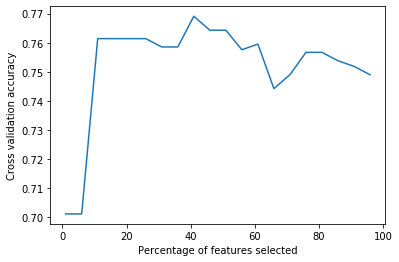

In [26]:
optimal_percentile_ind = np.where(results == results.max())[0][0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind]*len(X.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

### Evaluate our best number of features on the test set

In [27]:
fs = feature_selection.SelectKBest(feature_selection.chi2, optimal_num_features)
X_train_fs = fs.fit_transform(X_train, y_train)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False)

Accuracy:0.821 

Classification report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       161
           1       0.76      0.78      0.77       101

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262
 



### Model selection

#### Exploring and comparing model parameters

In [28]:
print(dt.get_params())

{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


#### Let's first focus on "criterion' parameter and find the best one

In [29]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(dt, X_train, y_train, cv=5)
print("Entropy criterion accuracy on cv: {0:.3f}".format(scores.mean()))

dt = tree.DecisionTreeClassifier(criterion='gini')
scores = cross_val_score(dt, X_train, y_train, cv=5)
print("Gini criterion accuracy on cv: {0:.3f}".format(scores.mean()))


Entropy criterion accuracy on cv: 0.737
Gini criterion accuracy on cv: 0.725


In [30]:
# Now we can fit the model to the full training data usign the optimal features and the desired parameters
# and apply the model to the set-aside test data
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.733 

Classification report
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       161
           1       0.65      0.66      0.66       101

    accuracy                           0.73       262
   macro avg       0.72      0.72      0.72       262
weighted avg       0.73      0.73      0.73       262
 



#### Another parameter of decision tree that can have an impact on accuracy is 'max-depth'

In [31]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(max_depth=5)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.790 



#### But, again, we need a more systematic way to explore the space of values for each parameter. The following is a general function that performs cross-validation using a range of values for a specified parameter of a model

In [32]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print(param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

#### Now we can explore the impact of max-depth more systematically

In [33]:
# Let's create an evenly spaced range of numbers in a specified interval
md = np.linspace(1, 40, 20)
md = np.array([int(e) for e in md])
print(md)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 40]


max_depth  =  1
max_depth  =  3
max_depth  =  5
max_depth  =  7
max_depth  =  9
max_depth  =  11
max_depth  =  13
max_depth  =  15
max_depth  =  17
max_depth  =  19
max_depth  =  21
max_depth  =  23
max_depth  =  25
max_depth  =  27
max_depth  =  29
max_depth  =  31
max_depth  =  33
max_depth  =  35
max_depth  =  37
max_depth  =  40


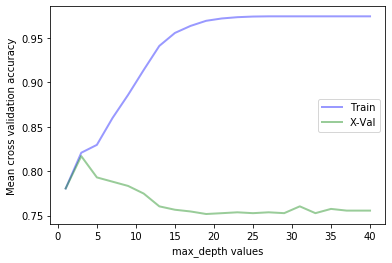

In [34]:
train_scores, test_scores = calc_params(X_train, y_train, dt, md, 'max_depth', 5)

#### max_depth = 3 seems to work best; larger values seem to lead to over-fitting.

In [35]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(max_depth=3)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.798 



#### Another parameter of decision tree that's important is the min number of samples allowed at a leaf node

min_samples_leaf  =  1
min_samples_leaf  =  3
min_samples_leaf  =  5
min_samples_leaf  =  7
min_samples_leaf  =  9
min_samples_leaf  =  11
min_samples_leaf  =  13
min_samples_leaf  =  15
min_samples_leaf  =  17
min_samples_leaf  =  19
min_samples_leaf  =  21
min_samples_leaf  =  23
min_samples_leaf  =  25
min_samples_leaf  =  27
min_samples_leaf  =  30


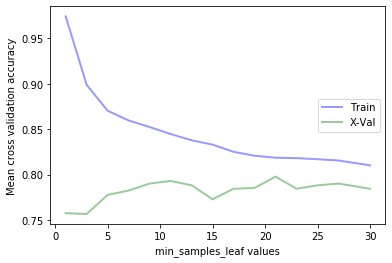

In [36]:
msl = np.linspace(1, 30, 15)
msl = np.array([int(e) for e in msl])

dt = tree.DecisionTreeClassifier(criterion='entropy')
train_scores, test_scores = calc_params(X_train, y_train, dt, msl, 'min_samples_leaf', 5)


#### Looks like min_samples_leaf around 21 seems like a good choice. Let's now combine these optimal parameter values in our final model to fit the full training data.

In [37]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(min_samples_leaf=21, max_depth=3)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False)

Accuracy:0.779 

Classification report
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       161
           1       0.71      0.71      0.71       101

    accuracy                           0.78       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262
 



#### Grid Search allows us to more systematically explore different combinations of multiple parameters

In [38]:
from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier()

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': np.linspace(1, 20, 10, dtype=int),
    'min_samples_leaf': np.linspace(1, 30, 15, dtype=int),
    'min_samples_split': np.linspace(2, 20, 10, dtype=int)
}

gs = GridSearchCV(dt, parameters, verbose=1, cv=5)

In [39]:
%time _ = gs.fit(X_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 1min 5s


[Parallel(n_jobs=1)]: Done 15000 out of 15000 | elapsed:  1.1min finished


({'criterion': 'gini',
  'max_depth': 3,
  'min_samples_leaf': 3,
  'min_samples_split': 2},
 0.8132183908045977)

In [40]:
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=3, min_samples_split=2)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.798 

Classification report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       161
           1       0.75      0.71      0.73       101

    accuracy                           0.80       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.80      0.80      0.80       262
 

